# Noisy evaluation

Meta-learning for noisy evaluation function:  
Reinforcement learning is prone to noise. It is harder to reproduce an experiment that trains a reinforcement learning agent. An agent can produce different results despite using the same seed for random number generator. Primary reasons are the following  

- Environment is stochastic. For the same action, state of the world and reward can be different
- Agents with different initialization of weights produce different results
- Parallel execution
- Distributed training
- Non-determinism from the ML framework
- Stochastic optimizer
    - Same input produces different output
- Stochastic environment and agent (RL)
    - Same set of actions produce different output
- Sensitiveness to hyperparameters

Noise in the agent's output impacts any meta-learning. I will demonstrate one example of noise when several parameters are tuned for `cartpole` reinforcement learning agent.

## Application: cartpole agent

![cart](https://camo.githubusercontent.com/7089af78ce27348d2a71698b6913f7656a6713cc/68747470733a2f2f63646e2d696d616765732d312e6d656469756d2e636f6d2f6d61782f3830302f312a6f4d5367325f6d4b677541474b793143363455466c772e676966 "cart")

In [ ]:
# Install dependencies
!pip install ray[rllib]

pip install pyglet~=1.3.2 > /dev/null 2>&1
pip install 'gym[atari]' > /dev/null 2>&1
#apt-get install python-opengl -y > /dev/null 2>&1
#apt install xvfb -y > /dev/null 2>&1
pip install pyvirtualdisplay > /dev/null 2>&1
pip install tensorflow==2.0.0-beta0 > /dev/null 2>&2

## Tune an RL agent

I use Ray Tune library to find optimal value for `learning rate` and `share layers` in the cartpole agent.

In [9]:
import ray
from ray import tune
import pandas as pd

config = {
    "env": 'CartPole-v0',
    "num_workers": 2,
    "vf_share_layers": tune.grid_search([True, False]),
    "lr": tune.grid_search([1e-4, 1e-5, 1e-6]),
    'seed': 91371
    }

results = tune.run(
    'PPO', 
    stop={
        'timesteps_total': 50000
    },
    config=config)


df = results.dataframe()

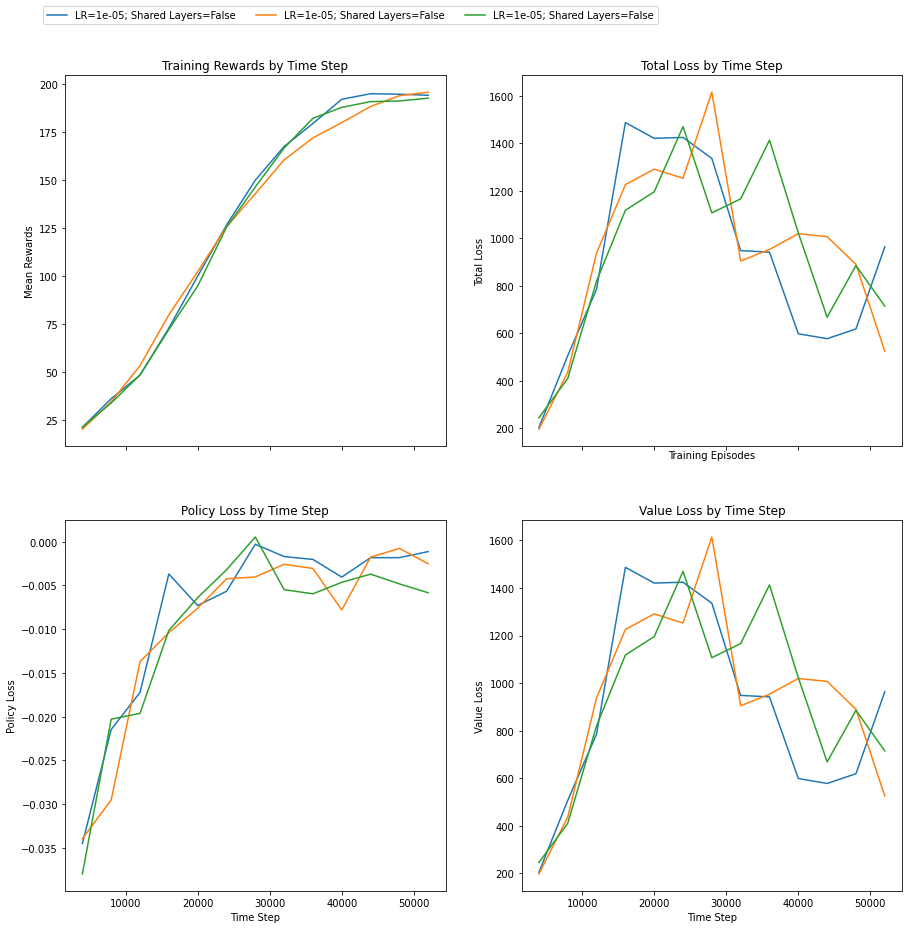

In [14]:
#hide_input
# plot
%matplotlib inline
# Plot training results
import matplotlib.pyplot as plt
import pandas as pd
import os

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
df = results.dataframe()# Get column for total loss, policy loss, and value loss
tl_col = [i for i, j in enumerate(df.columns)
          if 'total_loss' in j][0]
pl_col = [i for i, j in enumerate(df.columns)
          if 'policy_loss' in j][0]
vl_col = [i for i, j in enumerate(df.columns)
          if 'vf_loss' in j][0]
labels = []
fig, ax = plt.subplots(2, 2, figsize=(15, 15), sharex=True)
        
# results from previous experiment: for i, path in df['logdir'].iteritems():
root = '/home/users/YOUR_USERNAME/ray_results/PPO/'
for i, experiment in enumerate(experiment_name):
    data = pd.read_csv(os.path.join(root, experiment, 'progress.csv'))
    # Get labels for legend
    lr = data['experiment_tag'][0].split('=')[1].split(',')[0]
    layers = data['experiment_tag'][0].split('=')[-1]
    labels.append('LR={}; Shared Layers={}'.format(lr, layers))
    
    ax[0, 0].plot(data['timesteps_total'], 
            data['episode_reward_mean'], 
            label=labels[-1])
    
    ax[0, 1].plot(data['timesteps_total'], 
           data.iloc[:, tl_col], 
           label=labels[-1])
    
    ax[1, 0].plot(data['timesteps_total'], 
               data.iloc[:, pl_col], 
               label=labels[-1])
    
    
    ax[1, 1].plot(data['timesteps_total'], 
               data.iloc[:, vl_col], 
               label=labels[-1])


ax[0, 0].set_ylabel('Mean Rewards')    
ax[0, 0].set_title('Training Rewards by Time Step')
ax[0, 0].legend(labels=labels, loc='upper center',
        ncol=3, bbox_to_anchor=[0.75, 1.2])
ax[0, 1].set_title('Total Loss by Time Step')
ax[0, 1].set_ylabel('Total Loss')
ax[0, 1].set_xlabel('Training Episodes')
ax[1, 0].set_title('Policy Loss by Time Step')
ax[1, 0].set_ylabel('Policy Loss')
ax[1, 0].set_xlabel('Time Step')
ax[1, 1].set_title('Value Loss by Time Step')
ax[1, 1].set_ylabel('Value Loss')
ax[1, 1].set_xlabel('Time Step')

plt.show()

In [13]:
#hide_input
experiment_name = [
    'PPO_CartPole-v0_5_lr=1e-06,vf_share_layers=False_2020-05-20_02-59-01obix_tex',
    'PPO_CartPole-v0_4_lr=1e-05,vf_share_layers=False_2020-05-20_02-57-24du3o7t81',
    'PPO_CartPole-v0_3_lr=0.0001,vf_share_layers=False_2020-05-20_02-57-24urv4slk3',
    'PPO_CartPole-v0_2_lr=1e-06,vf_share_layers=True_2020-05-20_02-57-24lvd8i1yd',
    'PPO_CartPole-v0_1_lr=1e-05,vf_share_layers=True_2020-05-20_02-57-246w7021xe',
    'PPO_CartPole-v0_0_lr=0.0001,vf_share_layers=True_2020-05-20_02-57-24rhhjk82w',
    
    'PPO_CartPole-v0_5_lr=1e-06,vf_share_layers=False_2020-05-20_02-42-23e9lmu8us',
    'PPO_CartPole-v0_4_lr=1e-05,vf_share_layers=False_2020-05-20_02-40-45ubvcbsq7',
    'PPO_CartPole-v0_3_lr=0.0001,vf_share_layers=False_2020-05-20_02-40-45te_040n1',
    'PPO_CartPole-v0_2_lr=1e-06,vf_share_layers=True_2020-05-20_02-40-45n9sljw9z',
    'PPO_CartPole-v0_1_lr=1e-05,vf_share_layers=True_2020-05-20_02-40-4594atibt0',
    'PPO_CartPole-v0_0_lr=0.0001,vf_share_layers=True_2020-05-20_02-40-453wm1geed'
]

experiment_name = [ 
    'PPO_CartPole-v0_4_lr=1e-05,vf_share_layers=False_2020-05-20_10-31-4577g1tjma',
    'PPO_CartPole-v0_4_lr=1e-05,vf_share_layers=False_2020-05-20_02-57-24du3o7t81',
    'PPO_CartPole-v0_4_lr=1e-05,vf_share_layers=False_2020-05-20_02-40-45ubvcbsq7',
    ]

To demonstrate noise, each trial are evaluated `k=3` times. Results from a subset of the trials are plotted above. Note that the agent's output are different for the same parameter `LR = 1e-5` and `Shared_Layers=False`. A custom agent is defined utilizing neural networks. It is optimized based on policy gradient. 

## Create a custom agent and environment

In [6]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model
import numpy as np
import gym


class AgentMLPTF(Model):
    def __init__(self):
        super(AgentMLPTF, self).__init__()
        self.d1 = Dense(15, activation='tanh')
        self.d2 = Dense(2)

    def call(self, x):
        # 1. Define Policy
        batch = True
        if x.ndim == 1:
            batch = False
            x = np.expand_dims(x, axis=0)
        x = self.d1(x)
        action_logits = self.d2(x)

        # 2. Sample policy to get action
        action = tf.random.categorical(action_logits, 1)
        action = action.numpy().flatten()
        if not batch:
            action = np.asscalar(action)

        return {"Action":action, "LogProbability":action_logits}

def get_episode_trajectory(env, agent, max_steps=1000):
    observation_list = []
    reward_list = []
    action_list = []
    value_list = []

    done = False
    obs = env.reset()
    for _ in range(max_steps):
        observation_list.append(obs)
        out = agent(obs)
        assert ("Action" in out), "The key 'Action' was missing from the agents output."
        action = out["Action"]        
        obs, rew, done, _, = env.step(action)
        reward_list.append(rew)
        action_list.append(action)
        if "Value" in out:
            value_list.append(out["Value"])
            
        if done:
            break
        
    ret = {
        "Observations": observation_list, 
        "Actions": action_list, 
        "Rewards": np.array(reward_list, dtype=np.float32)
    }
    if len(value_list) > 0:
        ret["Values"] = value_list
        
    return ret

def reward_to_go(rewards):
    return np.flip(np.cumsum(np.flip(rewards)))

def train_policy_grad(env, agent, num_epochs=300):
    optimizer = tf.keras.optimizers.Adam(lr=1e-2)
    log_reward = 0
    log_reward_list = []
    logging_period = 20
    
    for epoch in range(num_epochs):
        # get the training data
        traj = get_episode_trajectory(env, agent)
        obs = np.stack(traj["Observations"])
        rew = traj["Rewards"]
        actions = traj["Actions"]
        
        # compute 'reward-to-go'
        rew_2_go = reward_to_go(rew)
        
        # compute gradients + update weights
        with tf.GradientTape() as tape:
            logits = agent(obs)["LogProbability"]
            loss = loss_pg(actions, logits, rew_2_go)
            
        gradients = tape.gradient(loss, agent.trainable_variables)
        optimizer.apply_gradients(zip(gradients, agent.trainable_variables))
        
        # log the reward
        log_reward += np.sum(rew)
        if (epoch % logging_period) == 0:
            template = 'Training Epoch {}, Averaged Return: {}'
            print(template.format(epoch, log_reward / logging_period))
            log_reward_list.append(log_reward / logging_period)
            log_reward = 0
       
    return (range(0, num_epochs, logging_period), log_reward_list)

#@title Answer { display-mode: "form" }

def loss_pg(actions, log_probs, returns):
    action_masks = tf.one_hot(actions, 2, dtype=np.float64)
    log_probs = tf.reduce_sum(action_masks * tf.nn.log_softmax(log_probs), axis=1)
    return -tf.reduce_sum(returns * log_probs)
  

# Note: this is equivalent to:
def loss_pg2(actions, log_probs, returns):
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, reduction=tf.keras.losses.Reduction.NONE)
    return tf.reduce_mean(returns * loss(actions, log_probs))

In [8]:
import gym
env_cartpole = gym.make('CartPole-v1')

agent_mlp_tf = AgentMLPTF()

(episodes, rewards) = train_policy_grad(env_cartpole, agent_mlp_tf)

There are various ways we can deal with noise in meta-learning. 
- Penalize parameters that produce output with high uncertainty or variability. 
- Resample parameters with higher uncertainty to reduce noise and increase quality of the meta-learner

Algorithm:  

* Set $N$ = $NUM\_SAMPLES$ 
* Run all individual $N$ times. 
    * Noisy feedbacks for $i$th individual: $f_{i}$
* Get Fitted individual based on:  $\operatorname*{argmax}_i \bar {f_{i}} + \frac {\sqrt{N}}{\sigma}$


* Run all individuals min_sample times
* Get Fitted individual based on: min(prob + sigma/sqrt(n))
* Repeat steps while no new individuals were sampled
* Add a threshold for standard error


* [NTBEA](https://arxiv.org/pdf/1802.05991.pdf)  
* [paper](https://arxiv.org/pdf/1802.05991.pdf)
* [paper2](https://arxiv.org/pdf/1606.06041.pdf)
* [paper3](https://openmole.org/paper/rakshit2016.pdf)